In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
df = pd.read_csv('day.csv')

In [106]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
df.shape

(730, 16)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [109]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping registered and casual feature columns

cnt output variable which is our target variable is a sum of registered and casual count feature variables as described in data dictionary. 
We are trying to predict Cnt variable as a function of registered and casual count feature variables.
When a model is trained using the registered and casual count feature variables which contains information about Cnt variable leads to DATA LEAKAGE
Hence we should remove these feature variables otherwise the model provides r2 score 1 and accuracy 100%

In [110]:
df.drop(['registered', 'casual'], axis=1, inplace=True)

### Dropping dteday feature variable as the day is captured in weekday, month is captured in mnth and year is captured in yr feature variables

In [111]:
df.drop('dteday', axis=1, inplace=True)

### Dropping instant feature variable whose value depicts a row index

In [112]:
df.drop('instant', axis=1, inplace=True)

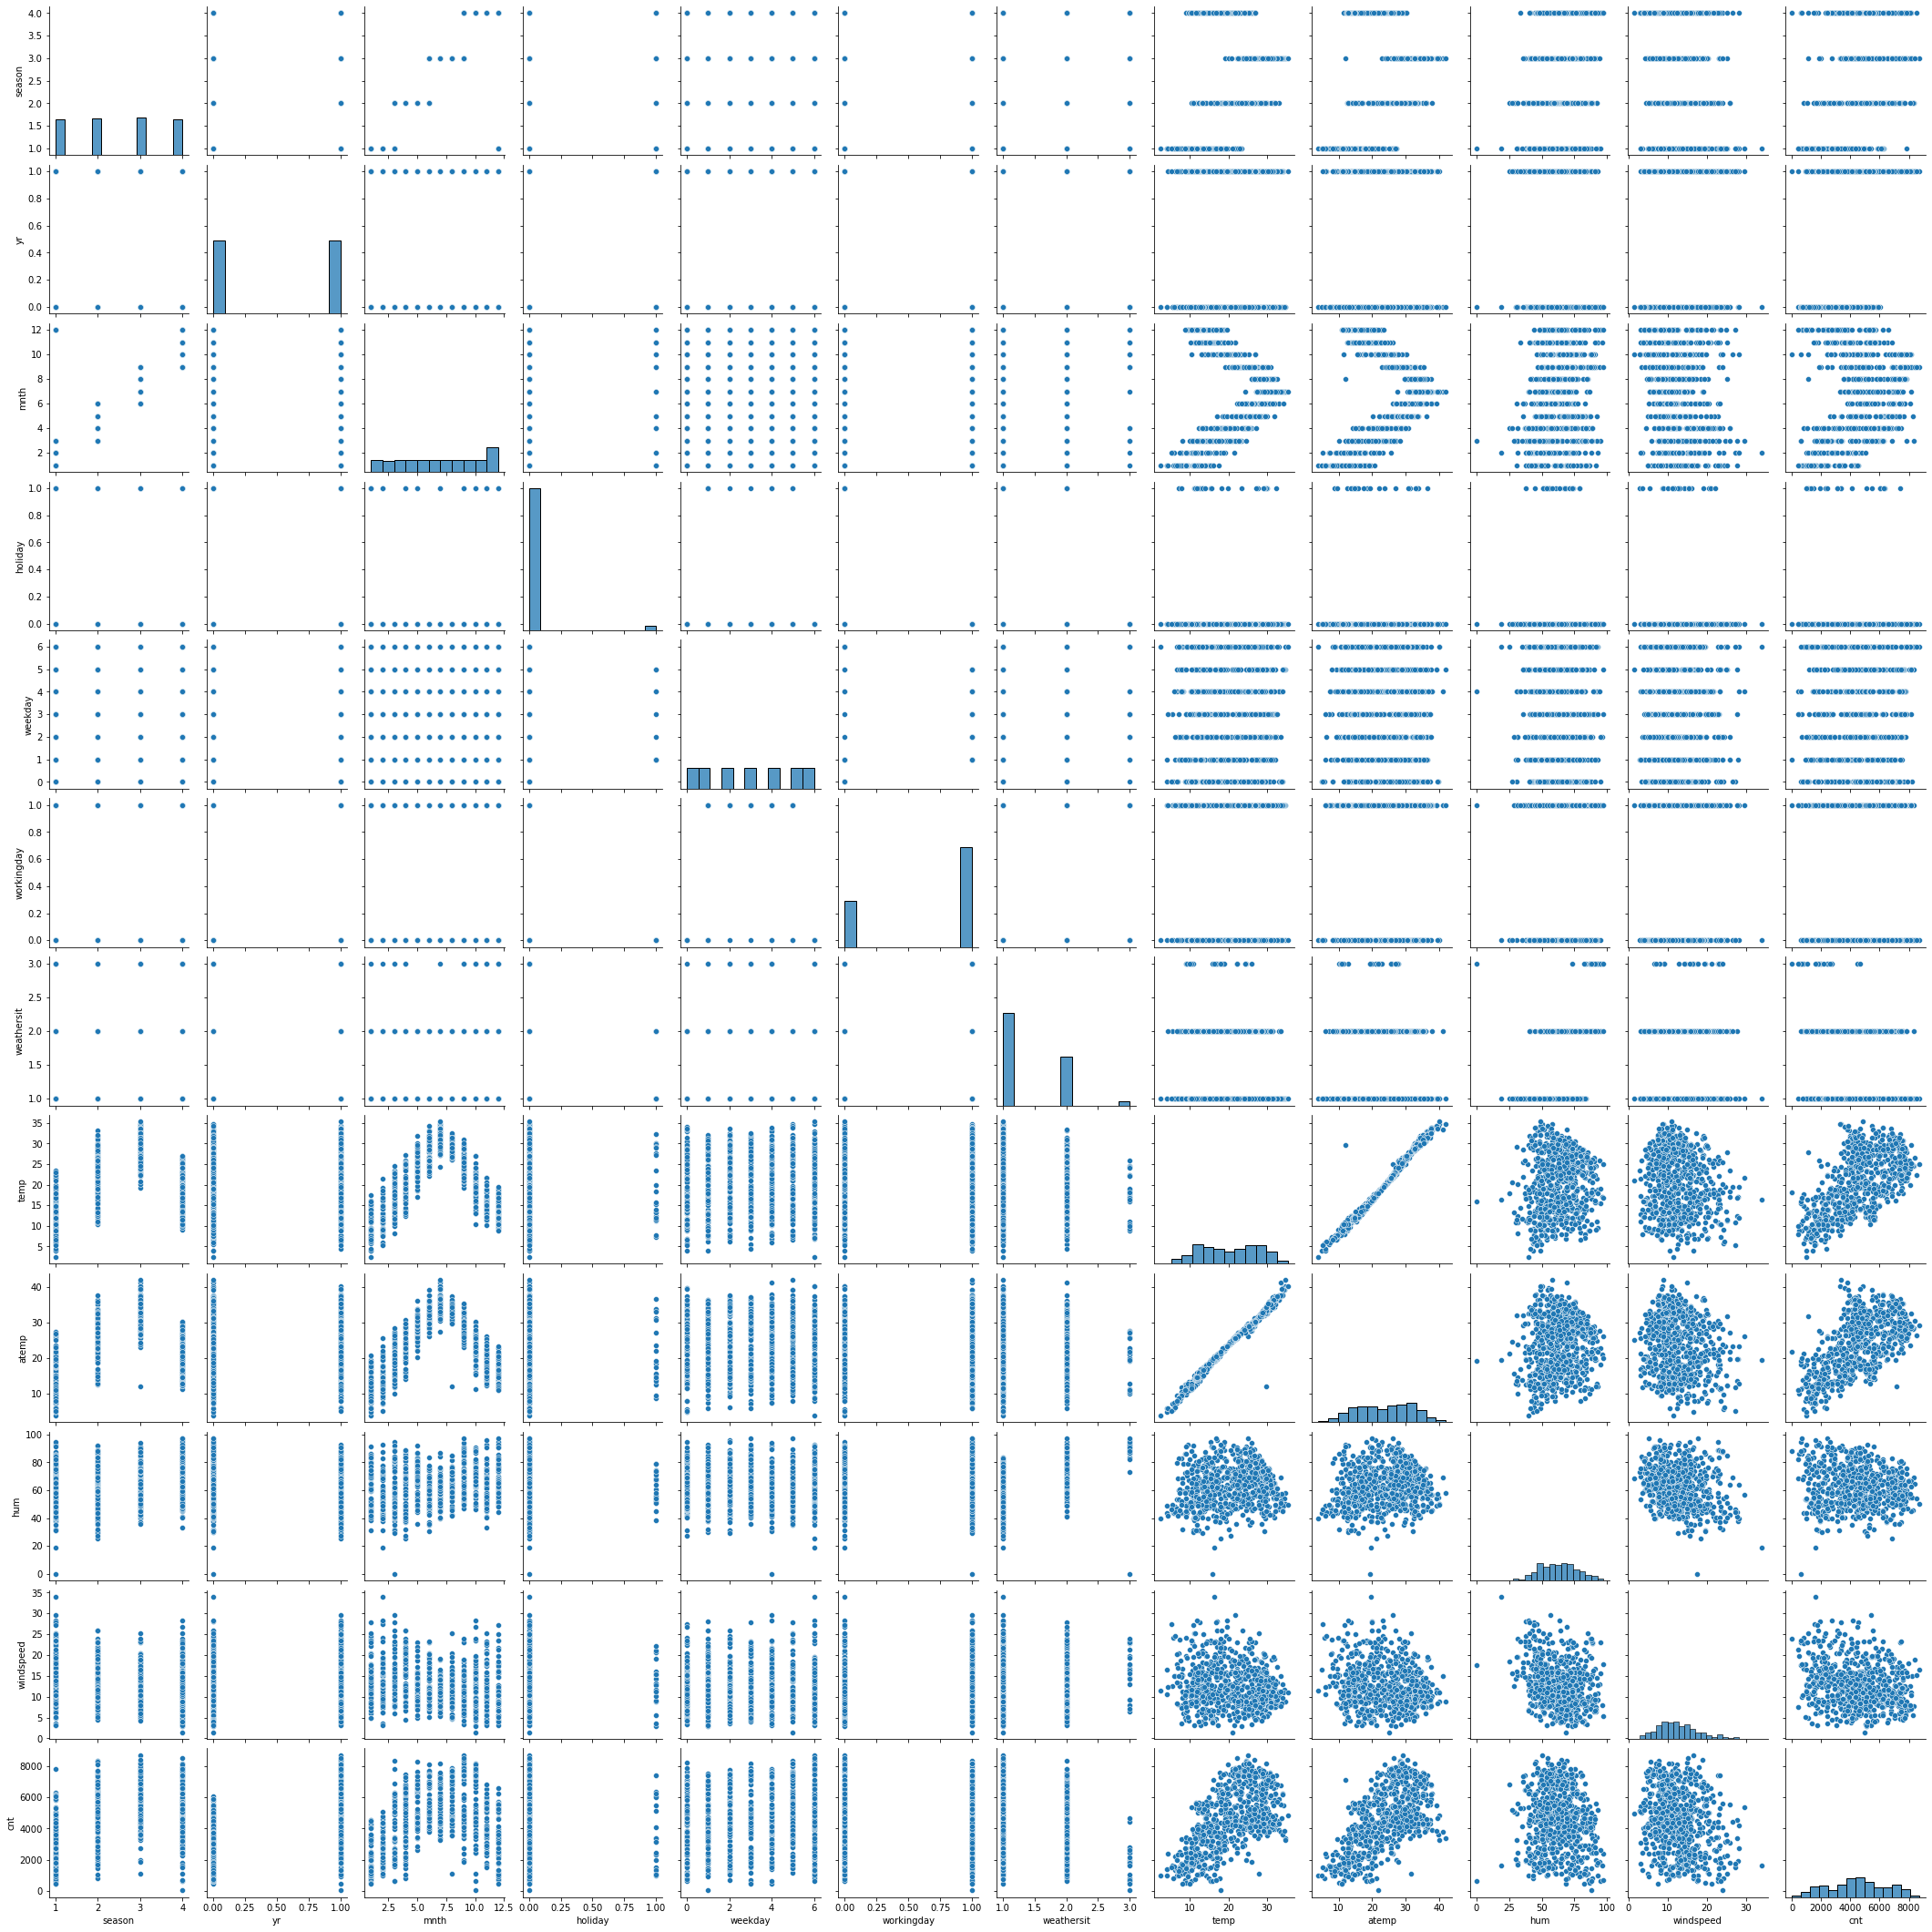

In [113]:
# Visualising Numerical variables
sns.pairplot(df)
plt.show()

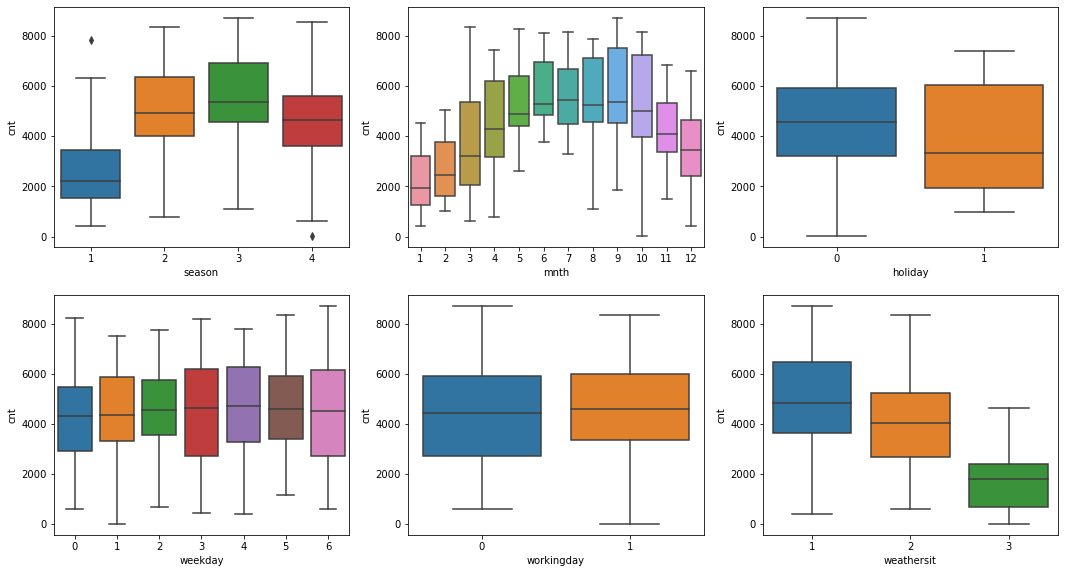

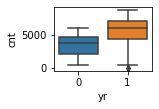

In [114]:
# Visualing the categorical variables
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

### Performing one hot encoding for the season variable as the numeric values associated with this categorical variable doesn't suggest any ordering and create dummy variables for this categorical variable to be used in ML modelling

In [115]:
season_df = pd.get_dummies(df['season'], prefix='season', drop_first=True)
season_df.rename(columns = {'season_1':'spring','season_2':'summer','season_3':'fall','season_4':'winter'}, inplace = True)
season_df.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


### Performing one hot encoding for the weathersit variable as the numeric values associated with this categorical variable doesn't suggest any ordering and create dummy variables for this categorical variable to be used in ML modelling

In [116]:
weather_df = pd.get_dummies(df['weathersit'], prefix='weathersit', drop_first=True)
weather_df.rename(columns = {'weathersit_1':'Clear','weathersit_2':'Mist','weathersit_3':'Light Rain'}, inplace = True)
weather_df.head()

,Mist,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [117]:
mnth_df = pd.get_dummies(df['mnth'], prefix='month', drop_first=True)
mnth_df.rename(columns = {'month_2':'Feb','month_3':'March','month_4':'April','month_4':'April', 'month_5':'May', 'month_6':'June','month_7':'July','month_8':'Aug','month_9':'Sep','month_10':'Oct','month_11':'Nov','month_12':'Dec'}, inplace = True)
mnth_df.head()

,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [118]:
weekday_df = pd.get_dummies(df['weekday'], prefix='day', drop_first=True)
weekday_df.rename(columns = {'day_1':'Mon','day_2':'Tue', 'day_3':'Wed', 'day_4':'Thu', 'day_5':'Fri', 'day_6':'Sat'}, inplace = True)
weekday_df.head()

,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [119]:
# Concatenate season_df and weather_df into the dataframe df
df = pd.concat([df, season_df, weather_df, weekday_df, mnth_df], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Drop columns weathersit and season as we have introduced dummy variables for the values in each categorical variable 
# season, weathersit
df.drop(['weathersit', 'season', 'weekday', 'mnth'], axis=1, inplace=True)

In [121]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'Mist', 'Light Rain', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [122]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


### Understanding the correlation of cnt with other feature variables

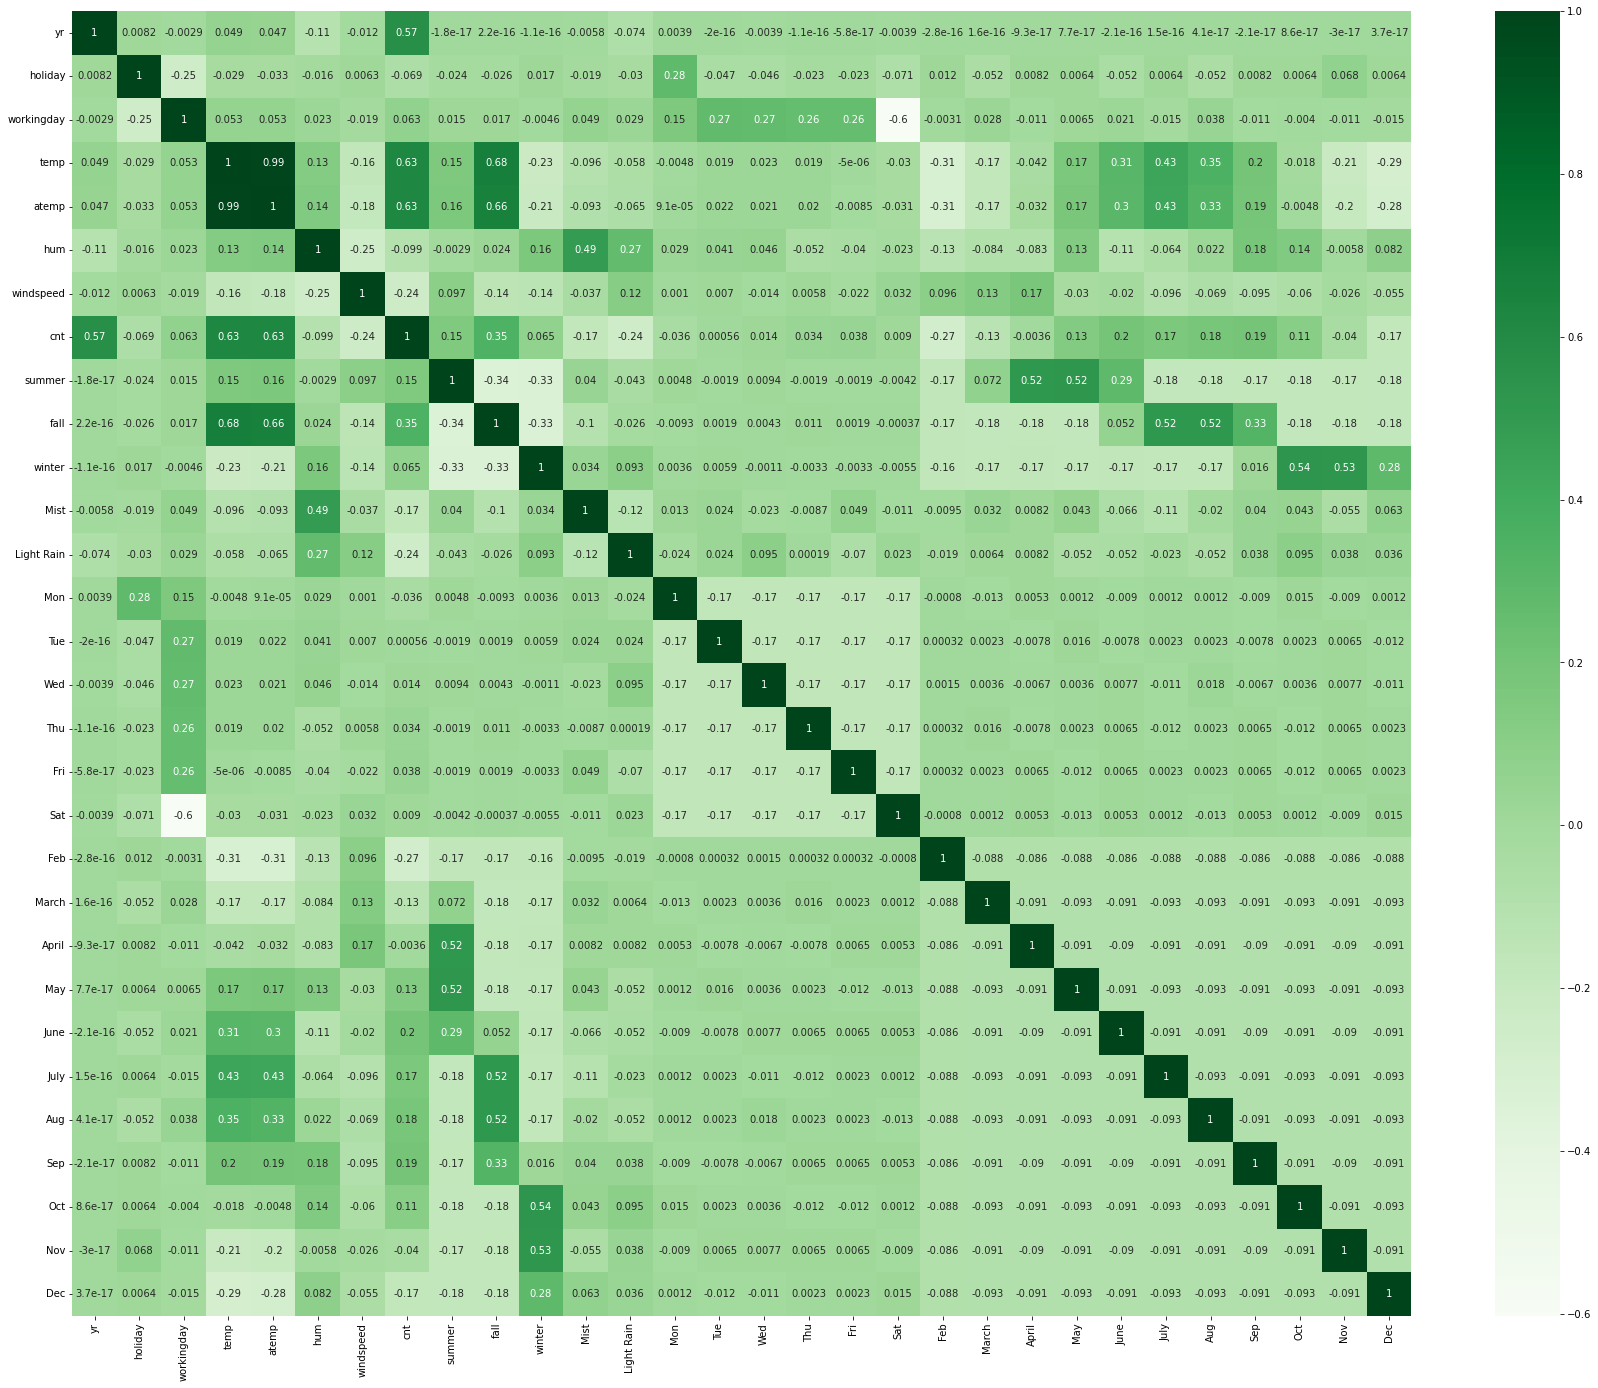

In [123]:
plt.figure(figsize=(30,24))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

### Splitting the data set into train and test

In [124]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [125]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,1,0,0,0,0,0,0


### Apply Min Max scaler on the train data set so that scale of each feature column lies in the range of [0,1]

In [126]:
scaler = MinMaxScaler()

In [127]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [128]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [129]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,1,0,0,0,0,0,0,0,0


### Building a model with highly correlated feature variable which is temp(From the Heat Map)

In [130]:
y_train = df_train.pop('cnt')
X_train = df_train

In [131]:
X_train = df_train[['temp']]

In [132]:
X_train_sm = sm.add_constant(df_train[['temp']])

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [134]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.46e-61
Time:                        16:04:10   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building a model with the next highly correlated feature variable which is yr(From the Heat Map)

In [135]:
X_train = df_train[['temp', 'yr']]

In [136]:
X_train_sm = sm.add_constant(df_train[['temp', 'yr']])

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [138]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.34e-130
Time:                        16:04:10   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above, The model's r2 score is increased from 0.416 to 0.692 when we add yr feature variable while training the model and most importantly the features yr and temp are significant

## Build the model using RFE and evaluate the model

In [139]:
from sklearn.feature_selection import RFE

In [140]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [141]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,1,0,0,0,0,0,0,0,0


In [142]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [143]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [144]:
y_train = df_train.pop('cnt')
X_train = df_train

In [145]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression()

In [146]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mist', True, 1),
 ('Light Rain', True, 1),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Thu', False, 15),
 ('Fri', False, 13),
 ('Sat', True, 1),
 ('Feb', False, 7),
 ('March', False, 2),
 ('April', False, 4),
 ('May', False, 3),
 ('June', False, 5),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10)]

In [148]:
col=X_train.columns[rfe.support_]

In [149]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'Mist', 'Light Rain', 'Sat', 'Aug', 'Sep', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [150]:
X_train_rfe = X_train[col]

In [151]:
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [152]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [153]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.17e-191
Time:                        16:04:10   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.029      6.790      0.0

In [154]:
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,temp,24.07
4,hum,17.44
7,fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,summer,3.46
8,winter,2.85
9,Mist,2.15
0,yr,2.04
11,Sat,1.91


### Drop fall as it exhibits higher VIF(8.19) and higher p-value(0.184) and rebuild model

In [155]:
X_train_rfe = X_train_rfe.drop('fall', axis = 1)

In [156]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [157]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        16:04:10   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light Rain    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
Sat            0.0527      0.015      3.627      0.000       0.024       0.081
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
col1 = col.drop('fall')

In [159]:
vif = pd.DataFrame()
vif['features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,winter,2.25
8,Mist,2.14
0,yr,2.03
10,Sat,1.90
6,summer,1.84
13,Oct,1.61


### Drop holiday as it exhibits p-value(0.039) and VIF(1.16) and rebuild model

In [160]:
X_train_rfe = X_train_rfe.drop('holiday', axis = 1)

In [161]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [162]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.92e-192
Time:                        16:04:10   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1850      0.028      6.497      0.000       0.129       0.241
yr             0.2294      0.008     28.640      0.000       0.214       0.245
workingday     0.0525      0.011      4.832      0.000       0.031       0.074
temp           0.5325      0.022     24.152      0.000       0.489       0.576
hum           -0.1698      0.037     -4.578      0.000      -0.243      -0.097
windspeed     -0.1866      0.025     -7.362      0.000      -0.236      -0.137
summer         0.1056      0.011      9.817      0.000       0.084       0.127
winter         0.1341      0.012     11.212      0.000       0.111       0.158
Mist          -0.0565      0.010     -5.438      0.000      -0.077      -0.036
Light Rain    -0.2462      0.026     -9.424      0.000      -0.298      -0.195
Sat            0.0611      0.014      4.365      0.000       0.034       0.089
Aug            0.0561      0.016      3.469      0.001       0.024       0.088
Sep            0.1235      0.016      7.635      0.000       0.092       0.155
Oct            0.0398      0.017      2.297      0.022       0.006       0.074
==============================================================================
Omnibus:                       75.917   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.075
Skew:                          -0.745   Prob(JB):                     9.74e-44
Kurtosis:                       5.665   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
col2 = col1.drop('holiday')

In [164]:
vif = pd.DataFrame()
vif['features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,16.06
2,temp,10.01
1,workingday,4.56
4,windspeed,3.76
6,winter,2.25
7,Mist,2.13
0,yr,2.03
5,summer,1.83
9,Sat,1.79
10,Aug,1.60


### Drop Oct as it exhibits p-value(0.022) and VIF(1.6) and rebuild model

In [165]:
X_train_rfe = X_train_rfe.drop('Oct', axis = 1)

In [166]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [167]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.37e-192
Time:                        16:04:10   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1780      0.028      6.260      0.000       0.122       0.234
yr             0.2291      0.008     28.482      0.000       0.213       0.245
workingday     0.0517      0.011      4.745      0.000       0.030       0.073
temp           0.5415      0.022     24.855      0.000       0.499       0.584
hum           -0.1653      0.037     -4.444      0.000      -0.238      -0.092
windspeed     -0.1833      0.025     -7.212      0.000      -0.233      -0.133
summer         0.1038      0.011      9.632      0.000       0.083       0.125
winter         0.1472      0.011     13.943      0.000       0.126       0.168
Mist          -0.0561      0.010     -5.377      0.000      -0.077      -0.036
Light Rain    -0.2408      0.026     -9.215      0.000      -0.292      -0.189
Sat            0.0605      0.014      4.306      0.000       0.033       0.088
Aug            0.0526      0.016      3.254      0.001       0.021       0.084
Sep            0.1176      0.016      7.332      0.000       0.086       0.149
==============================================================================
Omnibus:                       67.727   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.278
Skew:                          -0.685   Prob(JB):                     4.74e-37
Kurtosis:                       5.449   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
col3 = col2.drop('Oct')

In [169]:
vif = pd.DataFrame()
vif['features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,16.03
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
7,Mist,2.12
0,yr,2.02
5,summer,1.82
9,Sat,1.79
6,winter,1.75
10,Aug,1.59


### Drop hum as it exhibits higher VIF(16.03) and rebuild model(Not dropping temp as its Coefficients is higher comparitively)

In [170]:
X_train_rfe = X_train_rfe.drop('hum', axis = 1)

In [171]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [172]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.31e-189
Time:                        16:04:11   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0809      0.019      4.365      0.000       0.045       0.117
yr             0.2328      0.008     28.578      0.000       0.217       0.249
workingday     0.0546      0.011      4.926      0.000       0.033       0.076
temp           0.5208      0.022     24.022      0.000       0.478       0.563
windspeed     -0.1518      0.025     -6.105      0.000      -0.201      -0.103
summer         0.1010      0.011      9.220      0.000       0.080       0.123
winter         0.1379      0.011     13.083      0.000       0.117       0.159
Mist          -0.0826      0.009     -9.474      0.000      -0.100      -0.065
Light Rain    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
Sat            0.0653      0.014      4.576      0.000       0.037       0.093
Aug            0.0512      0.016      3.111      0.002       0.019       0.084
Sep            0.1117      0.016      6.864      0.000       0.080       0.144
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
col4 = col3.drop('hum')

In [174]:
vif = pd.DataFrame()
vif['features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
8,Sat,1.69
9,Aug,1.58
6,Mist,1.54
5,winter,1.51
10,Sep,1.30


### Drop workingday and rebuild model

In [175]:
X_train_rfe = X_train_rfe.drop('workingday', axis = 1)

In [176]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [177]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.60e-185
Time:                        16:04:11   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1225      0.017      7.253      0.000       0.089       0.156
yr             0.2333      0.008     27.993      0.000       0.217       0.250
temp           0.5224      0.022     23.554      0.000       0.479       0.566
windspeed     -0.1537      0.025     -6.045      0.000      -0.204      -0.104
summer         0.1030      0.011      9.191      0.000       0.081       0.125
winter         0.1359      0.011     12.604      0.000       0.115       0.157
Mist          -0.0797      0.009     -8.954      0.000      -0.097      -0.062
Light Rain    -0.2783      0.025    -11.117      0.000      -0.327      -0.229
Sat            0.0217      0.011      1.894      0.059      -0.001       0.044
Aug            0.0548      0.017      3.255      0.001       0.022       0.088
Sep            0.1132      0.017      6.798      0.000       0.080       0.146
==============================================================================
Omnibus:                       70.106   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.055
Skew:                          -0.747   Prob(JB):                     3.53e-34
Kurtosis:                       5.240   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
col5 = col4.drop('workingday')

In [179]:
vif = pd.DataFrame()
vif['features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,temp,5.03
2,windspeed,3.14
0,yr,2.00
3,summer,1.81
8,Aug,1.58
5,Mist,1.49
4,winter,1.48
9,Sep,1.30
7,Sat,1.18
6,Light Rain,1.08


### Drop sat as it has p-value(0.059) and rebuild model

In [180]:
X_train_rfe = X_train_rfe.drop('Sat', axis = 1)

In [181]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

In [182]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.26e-185
Time:                        16:04:11   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     500   BIC:                            -917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1260      0.017      7.480      0.000       0.093       0.159
yr             0.2329      0.008     27.877      0.000       0.216       0.249
temp           0.5210      0.022     23.444      0.000       0.477       0.565
windspeed     -0.1515      0.025     -5.950      0.000      -0.202      -0.102
summer         0.1029      0.011      9.158      0.000       0.081       0.125
winter         0.1361      0.011     12.599      0.000       0.115       0.157
Mist          -0.0795      0.009     -8.919      0.000      -0.097      -0.062
Light Rain    -0.2776      0.025    -11.062      0.000      -0.327      -0.228
Aug            0.0557      0.017      3.301      0.001       0.023       0.089
Sep            0.1134      0.017      6.796      0.000       0.081       0.146
==============================================================================
Omnibus:                       64.474   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.949
Skew:                          -0.675   Prob(JB):                     4.53e-33
Kurtosis:                       5.277   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
col6 = col5.drop('Sat')

In [184]:
vif = pd.DataFrame()
vif['features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,temp,5.01
2,windspeed,3.08
0,yr,2.00
3,summer,1.81
7,Aug,1.58
5,Mist,1.49
4,winter,1.48
8,Sep,1.30
6,Light Rain,1.08


In [185]:
y_train_pred = lr_model.predict(X_train_rfe)

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

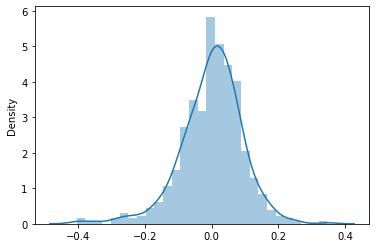

In [186]:
res = y_train - y_train_pred
sns.distplot(res)

### From the above, we can see that residual error follow normal distribution, following the assumptions for building linear regression model

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

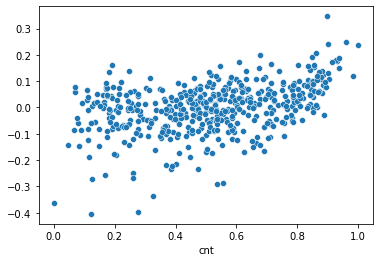

In [187]:
sns.scatterplot(y_train, res)

### From the above, we can see that error terms are independent of each other

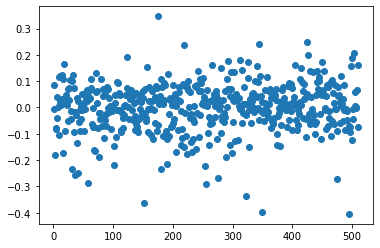

In [202]:
# Training 
res = (y_train - y_train_pred)
x = [i for i in range(1,len(res)+1)]

plt.scatter(x,res)
plt.show()

### From the above, we can see that error terms have constant covariance 

### Predict on the test set using the ML model built

In [188]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [189]:
y_test = df_test.pop('cnt')
X_test = df_test

In [190]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [191]:
X_train_rfe.head()

,const,yr,temp,windspeed,summer,winter,Mist,Light Rain,Aug,Sep
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,1,0,0,0
728,1.0,1,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0.395666,0.188475,1,0,1,0,0,0
111,1.0,0,0.345824,0.380981,1,0,1,0,0,0


In [192]:
X_test.drop(['workingday', 'holiday', 'Feb', 'March','April', 'May', 'June', 'July', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue','Wed','Thu','Fri','Sat','atemp','hum','fall'], axis=1, inplace=True)

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [193]:
X_test.head()

,yr,temp,windspeed,summer,winter,Mist,Light Rain,Aug,Sep
184,0,0.831783,0.084219,0,0,1,0,0,0
535,1,0.901354,0.153728,1,0,0,0,0,0
299,0,0.511964,0.334206,0,1,1,0,0,0
221,0,0.881625,0.339570,0,0,0,0,1,0
152,0,0.817246,0.537414,1,0,0,0,0,0


In [194]:
X_test = sm.add_constant(X_test)

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [195]:
y_test_pred = lr_model.predict(X_test)

### Model Evaluation

In [196]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7910951880182203

Text(0, 0.5, 'y_pred')

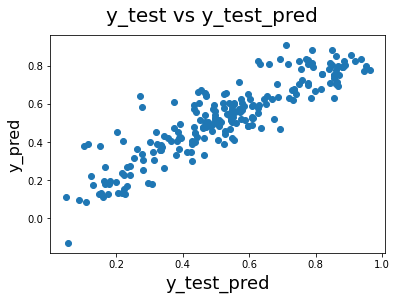

In [198]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_pred', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Final model equation using RFE

### we can see that the equation of our best fitted line is:
### cnt = 0.1260 + 0.5210 x temp + 0.2329 x yr + 0.1361 x winter + 0.1029 x summer + 0.1134 x Sep + 0.0557 x Aug -  0.0795 x Mist - 0.1515x windspeed - 0.2776 x Light Rain

## Conclusions

### 1. Bike Demand is positively correlated with temp and the model coefficient of 0.52 signify that it is the driver variable which influence bike demand the most
### 2. Bike Demand has picked up in the year 2019 compared to 2018
### 3. Bike demand exhibit negative correlation with Mist, WindSpeed and Light Rain which is self explanatory
### 4. Bike demand gets higher in Aug and Sep months
### 5. Bike demand gets higher in winter and summer seasons